15 21.71996263 
16 21.82945997 
17 21.97271742 
18 22.04669546 
19 22.12711278 
20 22.20314918 
21 22.24803141 
22 22.29999228 
23 22.33455220 
24 22.37333482 
25 22.40174429 
26 22.43515694 
27 22.46173227 
28 22.48270157 
29 22.50173308 
30 22.52524752 
31 22.54981295 
32 22.56836982 
33 22.58835364 
34 22.60652346 
35 22.62550054 
36 22.63958790 
37 22.65286693 
38 22.66796546 
39 22.67989717 
40 22.68718743 
41 22.69890563 
42 22.70796698 
43 22.71422073 
44 22.71873832 
45 22.72625677 
46 22.73388936 
47 22.73747483 
48 22.74105591 
49 22.74613099 
50 22.74962854 
51 22.75221988 
52 22.75525436 
53 22.75759261 
54 22.76048709 
55 22.76265407 
56 22.76451653 
57 22.76657402 
58 22.76810438 
59 22.76986837 
60 22.77195737 
61 22.77319762 
62 22.77454953 
63 22.77618651 
64 22.77724310 
65 22.77840575 
66 22.77974272 
67 22.78056580 
68 22.78186005 
69 22.78259254 
70 22.78351633 
71 22.78437777 
72 22.78505687 
73 22.78566666 
74 22.78615230 
75 22.78667844 
76 22.78713136 
77 22.78

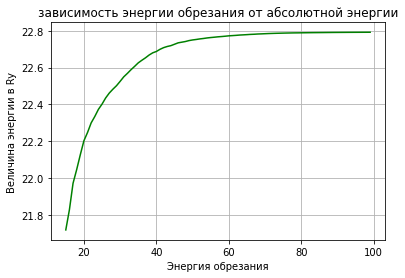

In [9]:
import os
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime
import time
start_time = datetime.now()
output = open('x.txt', 'w')
output = open('y.txt', 'w')
with open('C.scf.in') as f:
    lines = f.readlines()
for cut in np.arange(15, 100, 1):
    lines[14] = '      ecutwfc = {},'.format(cut)
    with open('input.in', 'w') as f:
        for l in lines:
                f.write(l)
    os.system('../bin/pw.x < input.in > output.txt')
    with open ('output.txt')as f:
        for l in f.readlines():
            if '!' in l:
                print(cut, l[38:50])
                output = open('x.txt', 'a' )
                print(cut, file= output)
                output = open('y.txt', 'a')
                print(l[38:50], file= output )
                output.close()
x = np.loadtxt('x.txt')
y = np.loadtxt('y.txt')
plt.title('зависимость энергии обрезания от абсолютной энергии')
plt.xlabel('Энергия обрезания')
plt.ylabel('Величина энергии в Ry')
plt.grid()
plt.plot(x, y, 'g')
plt.savefig('result.jpg')
time.sleep(1)
print('JOB DONE', datetime.now() - start_time)

    Пояснение к вышеописанному: при увеличении радиуса обрезания абсолютная энергия так же увеличивается, так как увеличивается точность измерений. График показывает, что использование энергии обрезания выше 50 Ryd не имеет смысла, так как точность измерений почти не увеличивается, в то время как ресурсозатратность растет.
    Условия расчетов приведены ниже:
&CONTROL
                 calculation = 'scf' ,
                restart_mode = 'from_scratch' ,
                      outdir = '/mnt/d/qe-6.5/task1/' ,
                  pseudo_dir = '/mnt/d/qe-6.5/task1/' ,
                      prefix = 'diamond' ,
                     tstress = .true. ,
                     tprnfor = .true. ,
 /
 &SYSTEM
                       ibrav = 2,
                   celldm(1) = 6.70,
                         nat = 2,
                        ntyp = 1,
                     ecutwfc = 40 ,
 /
 &ELECTRONS
                    conv_thr = 1.0d-8 ,
                 mixing_mode = 'plain' ,
                 mixing_beta = 0.7 ,
             diagonalization = 'david' ,
 /
ATOMIC_SPECIES
    C   12.01100  C.pz-vbc.UPF 
ATOMIC_POSITIONS 
    C      0.000000000    0.000000000    0.000000000    
    C      0.250000000    0.250000000    0.250000000    
K_POINTS {automatic}
   4 4 4   0 0 0 